## Import Libraries 

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

## Read in Files

#### OSM Shape Files

In [2]:
# Read in the shape files as a Geo dataframe 
# "..._area_..." - indicates features drawn as areas
# "..._line_..." - indicates features drawn as lines/points

landuse_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_landuse_a_free_1.shp')
roads_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_roads_free_1.shp')

# Dataframes which contain features of areas and points/lines
natural_area_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_natural_a_free_1.shp')
natural_line_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_natural_free_1.shp')

places_area_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_places_a_free_1.shp')
places_line_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_places_free_1.shp')

pofw_area_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_pofw_a_free_1.shp')
pofw_line_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_pofw_free_1.shp')

pois_area_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_pois_a_free_1.shp')
pois_line_gdf = gpd.read_file('/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Australia_OSM/gis_osm_pois_free_1.shp')

#### Other Files

In [3]:
vic_suburbs = gpd.read_file("/Users/promaali/Desktop/Desktop Documents/Unimelb 2024/Sem 2/Applied Data Science/A2/Vic_Localities/gda2020_vicgrid/esrishape/whole_of_dataset/victoria/VMADMIN/LOCALITY_POLYGON.shp")

#### View the OSM Dataframes

In [4]:
gdfs = {
    'landuse_gdf': landuse_gdf,
    'roads_gdf': roads_gdf,
    'natural_area_gdf': natural_area_gdf,
    'natural_line_gdf': natural_line_gdf,
    'places_area_gdf': places_area_gdf,
    'places_line_gdf': places_line_gdf,
    'pofw_area_gdf': pofw_area_gdf,
    'pofw_line_gdf': pofw_line_gdf,
    'pois_area_gdf': pois_area_gdf,
    'pois_line_gdf': pois_line_gdf
}

# View the details of each dataframe
for name, gdf in gdfs.items():
    print(f"\n---------------------------- {name} ----------------------------")
    print("Columns:", gdf.columns)
    print("Shape:", gdf.shape)
    print("First 5 rows:")
    print(gdf.head())
    print("Unique 'fclass' values:")
    print(gdf['fclass'].unique())


---------------------------- landuse_gdf ----------------------------
Columns: Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')
Shape: (490185, 5)
First 5 rows:
    osm_id  code fclass                           name  \
0  4018601  7202   park                  Anderson Park   
1  4018602  7202   park                      Gold Park   
2  4061402  7202   park                    Queens Park   
3  4085520  7202   park             Ollie Webb Reserve   
4  4282955  7202   park  Brisbane City Botanic Gardens   

                                            geometry  
0  POLYGON ((151.96054 -27.5783, 151.96054 -27.57...  
1  POLYGON ((151.95151 -27.58105, 151.95153 -27.5...  
2  POLYGON ((151.95787 -27.56136, 151.95788 -27.5...  
3  POLYGON ((150.99548 -33.82277, 150.99557 -33.8...  
4  POLYGON ((153.02744 -27.4747, 153.02773 -27.47...  
Unique 'fclass' values:
['park' 'recreation_ground' 'residential' 'industrial' 'commercial'
 'military' 'cemetery' 'forest' 'nature_rese

## Stack Area and Point/Line Files into One File

In [5]:
# Use the concat function to do this 
natural_gdf = pd.concat([natural_area_gdf, natural_line_gdf], ignore_index=True)
places_gdf = pd.concat([places_area_gdf, places_line_gdf], ignore_index=True)
pofw_gdf = pd.concat([pofw_area_gdf, pofw_line_gdf], ignore_index=True)
pois_gdf = pd.concat([pois_area_gdf, pois_line_gdf], ignore_index=True)

In [6]:
print("\n----------------------------- Natural Combined GeoDataFrame -----------------------------")
print(natural_gdf.shape)
print(natural_gdf.head())

print("\n----------------------------- Places Combined GeoDataFrame -----------------------------")
print(places_gdf.shape)
print(places_gdf.head())

print("\n----------------------------- POFW Combined GeoDataFrame -----------------------------")
print(pofw_gdf.shape)
print(pofw_gdf.head())

print("\n----------------------------- POIs Combined GeoDataFrame -----------------------------")
print(pois_gdf.shape)
print(pois_gdf.head())


----------------------------- Natural Combined GeoDataFrame -----------------------------
(477883, 5)
    osm_id  code fclass              name  \
0  4042219  4141  beach  Freshwater Beach   
1  4042355  4141  beach     Dee Why Beach   
2  4042505  4141  beach     Bilgola Beach   
3  4044016  4141  beach  Warriewood Beach   
4  4335014  4141  beach       Whale Beach   

                                            geometry  
0  POLYGON ((151.28911 -33.78233, 151.28913 -33.7...  
1  POLYGON ((151.29679 -33.75261, 151.29681 -33.7...  
2  POLYGON ((151.32709 -33.6466, 151.32718 -33.64...  
3  POLYGON ((151.30826 -33.68926, 151.30879 -33.6...  
4  POLYGON ((151.33089 -33.61265, 151.33106 -33.6...  

----------------------------- Places Combined GeoDataFrame -----------------------------
(36896, 6)
    osm_id  code  fclass  population              name  \
0  4369846  1001    city           0              None   
1  4700555  1020  island           0  Adventure Island   
2  4822382  1020  isl

## Filter for the Areas within the Victoria Region

In [7]:
# Ensure all OSM files are geodataframes and convert every gdf to the correct CRS
vic_suburbs_gdf = vic_suburbs.to_crs(epsg=4326)
gdfs = {
    'landuse_gdf': gpd.GeoDataFrame(landuse_gdf).to_crs(epsg=4326),
    'roads_gdf': gpd.GeoDataFrame(roads_gdf).to_crs(epsg=4326),
    'natural_gdf': gpd.GeoDataFrame(natural_gdf).to_crs(epsg=4326),
    'places_gdf': gpd.GeoDataFrame(places_gdf).to_crs(epsg=4326),
    'pofw_gdf': gpd.GeoDataFrame(pofw_gdf).to_crs(epsg=4326),
    'pois_gdf': gpd.GeoDataFrame(pois_gdf).to_crs(epsg=4326)
}

# Spatial join and filter features that fall within suburb geometries (based on areas that intersect)
def filter_vic_region(gdf, suburbs_gdf):
    filtered_gdf = gpd.sjoin(gdf, suburbs_gdf, how='inner', predicate='intersects')
    return filtered_gdf

# Filter each gdf and store in filtered_gdfs
filtered_gdfs = {}
for name, gdf in gdfs.items():
    filtered_gdfs[name] = filter_vic_region(gdf, vic_suburbs_gdf)

# Display the filtered gdfs
for name, gdf in filtered_gdfs.items():
    print(f"\n----------------------------- Filtered {name} -----------------------------")
    print("Shape after filtering:", gdf.shape)
    print(gdf.head())


----------------------------- Filtered landuse_gdf -----------------------------
Shape after filtering: (142310, 16)
     osm_id  code  fclass                      name  \
61  4394426  7202    park                      None   
62  4396215  7202    park  Scotchmans Creek Reserve   
63  4396215  7201  forest  Scotchmans Creek Reserve   
64  4396376  7202    park  Scotchmans Creek Reserve   
65  4472473  7202    park            Bogong Reserve   

                                             geometry  index_right        UFI  \
61  POLYGON ((145.14888 -37.87904, 145.14899 -37.8...         1815  767125259   
62  POLYGON ((145.14631 -37.88405, 145.14649 -37.8...         1815  767125259   
63  POLYGON ((145.14631 -37.88405, 145.14649 -37.8...         1815  767125259   
64  POLYGON ((145.14971 -37.88515, 145.15003 -37.8...         1815  767125259   
65  POLYGON ((145.15571 -37.88091, 145.15578 -37.8...         1815  767125259   

          PFI       LOCALITY         GAZLOC  VICNAMESID  TASK_ID

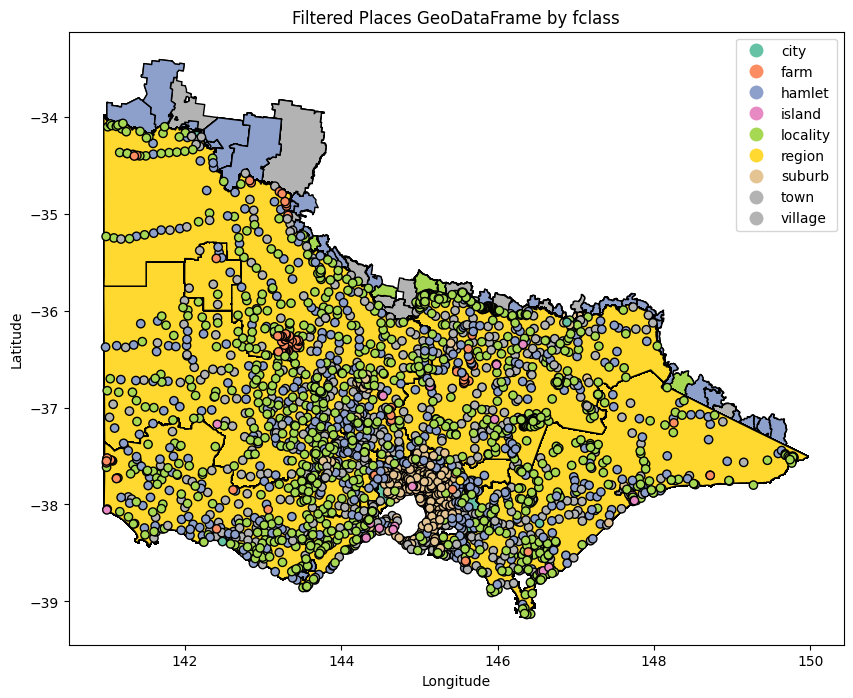

In [8]:
# PLOT the places_gdf TO SEE THAT ONLY THE VIC REGION IS SELECTED 

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdfs['places_gdf'].plot(ax=ax, column='fclass', legend=True, cmap='Set2', edgecolor='black')

ax.set_title('Places GDF Visualisation After FIltering for VIC Region')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


## Filter Features

In [9]:
# Keep the columns of fclass, name and geometry in each gdf
for name, gdf in filtered_gdfs.items():
    columns = [col for col in ['fclass', 'name', 'geometry'] if col in gdf.columns]
    filtered_gdfs[name] = gdf[columns]

In [10]:
# View the unique features in the dataframes
for name, gdf in filtered_gdfs.items():
    print(f"\n---------------------------- {name} ----------------------------")
    print("Unique 'fclass' values:")
    print(gdf['fclass'].unique())


---------------------------- landuse_gdf ----------------------------
Unique 'fclass' values:
['park' 'forest' 'cemetery' 'industrial' 'retail' 'residential'
 'recreation_ground' 'nature_reserve' 'commercial' 'allotments' 'grass'
 'quarry' 'military' 'vineyard' 'scrub' 'farmyard' 'farmland' 'meadow'
 'heath' 'orchard']
Shape after filtering: (142310, 3)
    fclass                      name  \
61    park                      None   
62    park  Scotchmans Creek Reserve   
63  forest  Scotchmans Creek Reserve   
64    park  Scotchmans Creek Reserve   
65    park            Bogong Reserve   

                                             geometry  
61  POLYGON ((145.14888 -37.87904, 145.14899 -37.8...  
62  POLYGON ((145.14631 -37.88405, 145.14649 -37.8...  
63  POLYGON ((145.14631 -37.88405, 145.14649 -37.8...  
64  POLYGON ((145.14971 -37.88515, 145.15003 -37.8...  
65  POLYGON ((145.15571 -37.88091, 145.15578 -37.8...  

---------------------------- roads_gdf --------------------------